In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

### 1. Загрузить файл data_breast.csv.

In [42]:
df = pd.read_csv('data_breast.csv')

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [48]:
desc_df=df.describe().loc[['mean','50%','max','min','std']]
desc_df.rename(index={'50%':'median'},inplace=True)
desc_df=pd.concat([desc_df,desc_df.mode().rename(index={0:'moda_0',1:'moda_1',2:'moda_2',3:'moda_3',4:'moda_4'})])
desc_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
moda_0,3.524049,4.301036,24.298981,143.500000,0.014064,0.019380,0.000000,0.000000,0.027414,0.007060,...,4.833242,6.146258,33.602542,185.200000,0.022832,0.027290,0.000000,0.000000,0.061867,0.018061
moda_1,6.981000,9.710000,43.790000,351.914129,0.052630,0.052813,0.061540,0.033500,0.106000,0.049960,...,7.930000,12.020000,50.410000,569.356993,0.071170,0.157336,0.208624,0.065732,0.156500,0.055040
moda_2,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.079720,0.038803,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
moda_3,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
moda_4,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Выбрать стратегию для работы с пропущенными значениями.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

Пропущенных значений нет

### 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

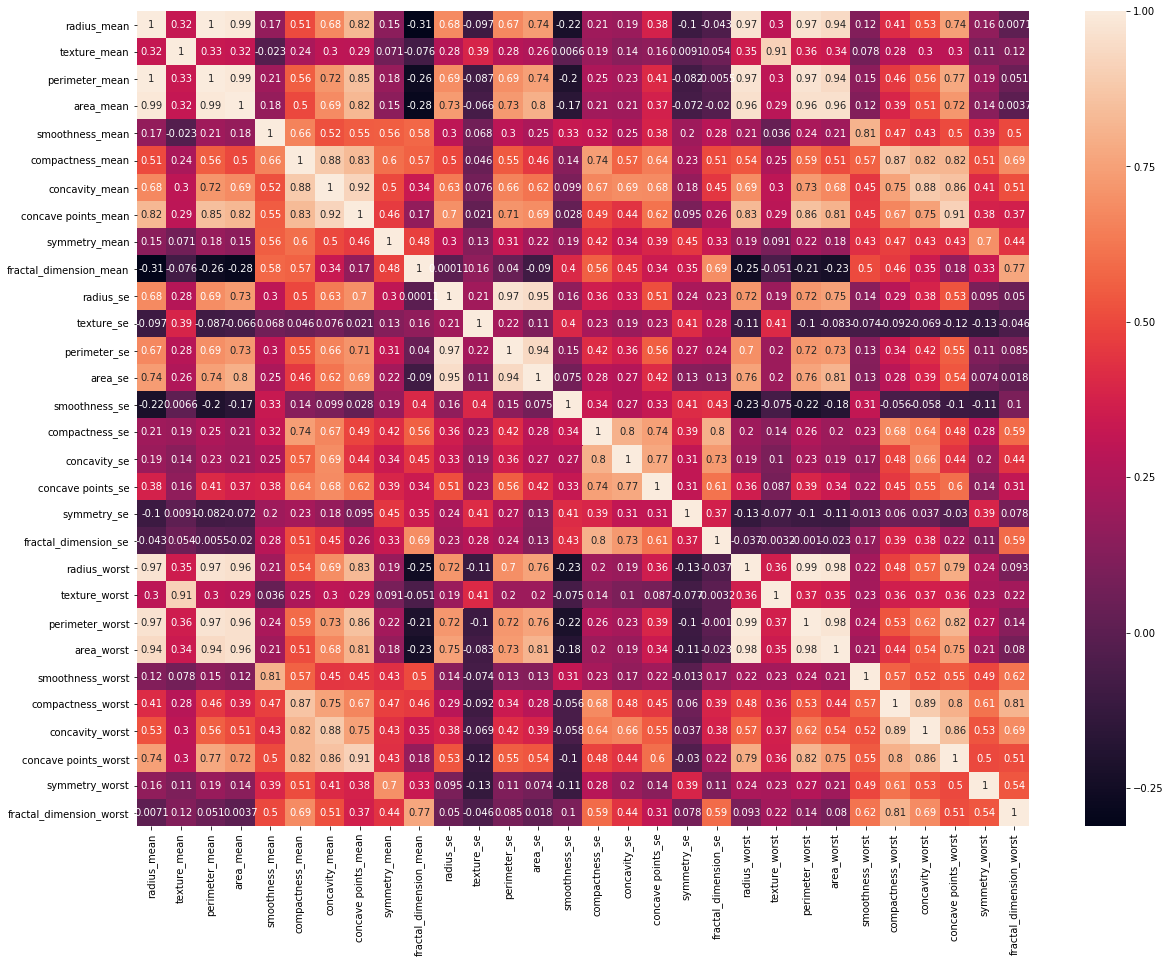

In [50]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

### 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

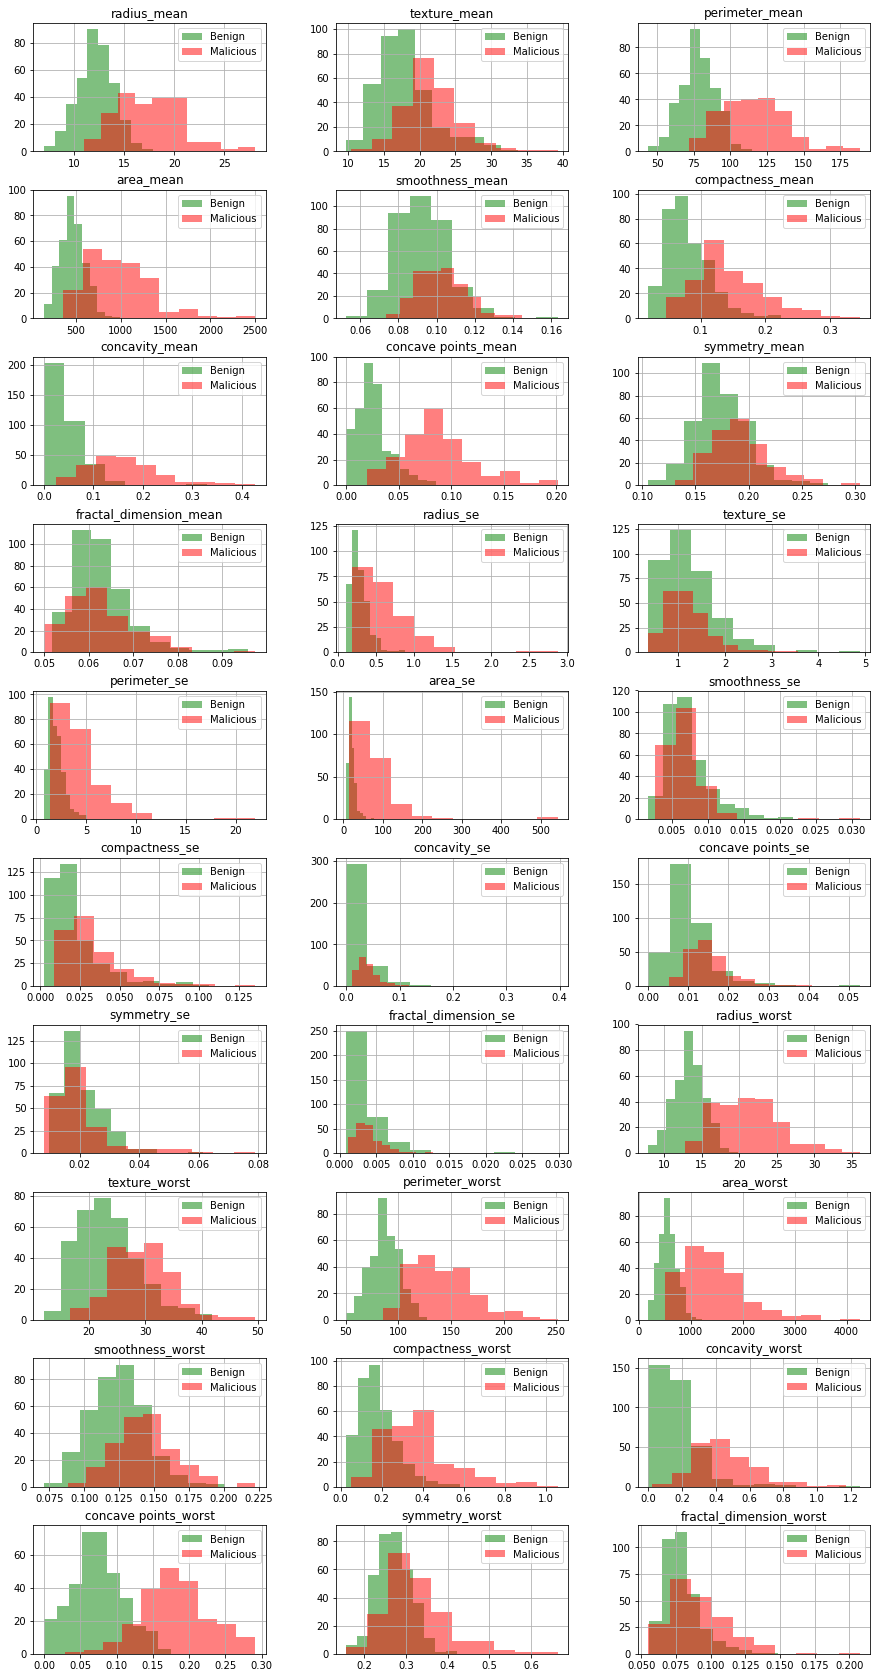

In [53]:
fig, ax  =  plt.subplots(10,3,figsize=(15,30))

for col,axis in zip(df.columns[1:],ax.flatten()):
    df.loc[df['diagnosis']=='B',df.columns!='diagnosis'].hist(column=col,ax=axis,alpha=0.5,color='green',label="Benign")
    df.loc[df['diagnosis']=='M',df.columns!='diagnosis'].hist(column=col,ax=axis,alpha=0.5,color='red',label="Malicious") 
    axis.legend(loc="upper right")

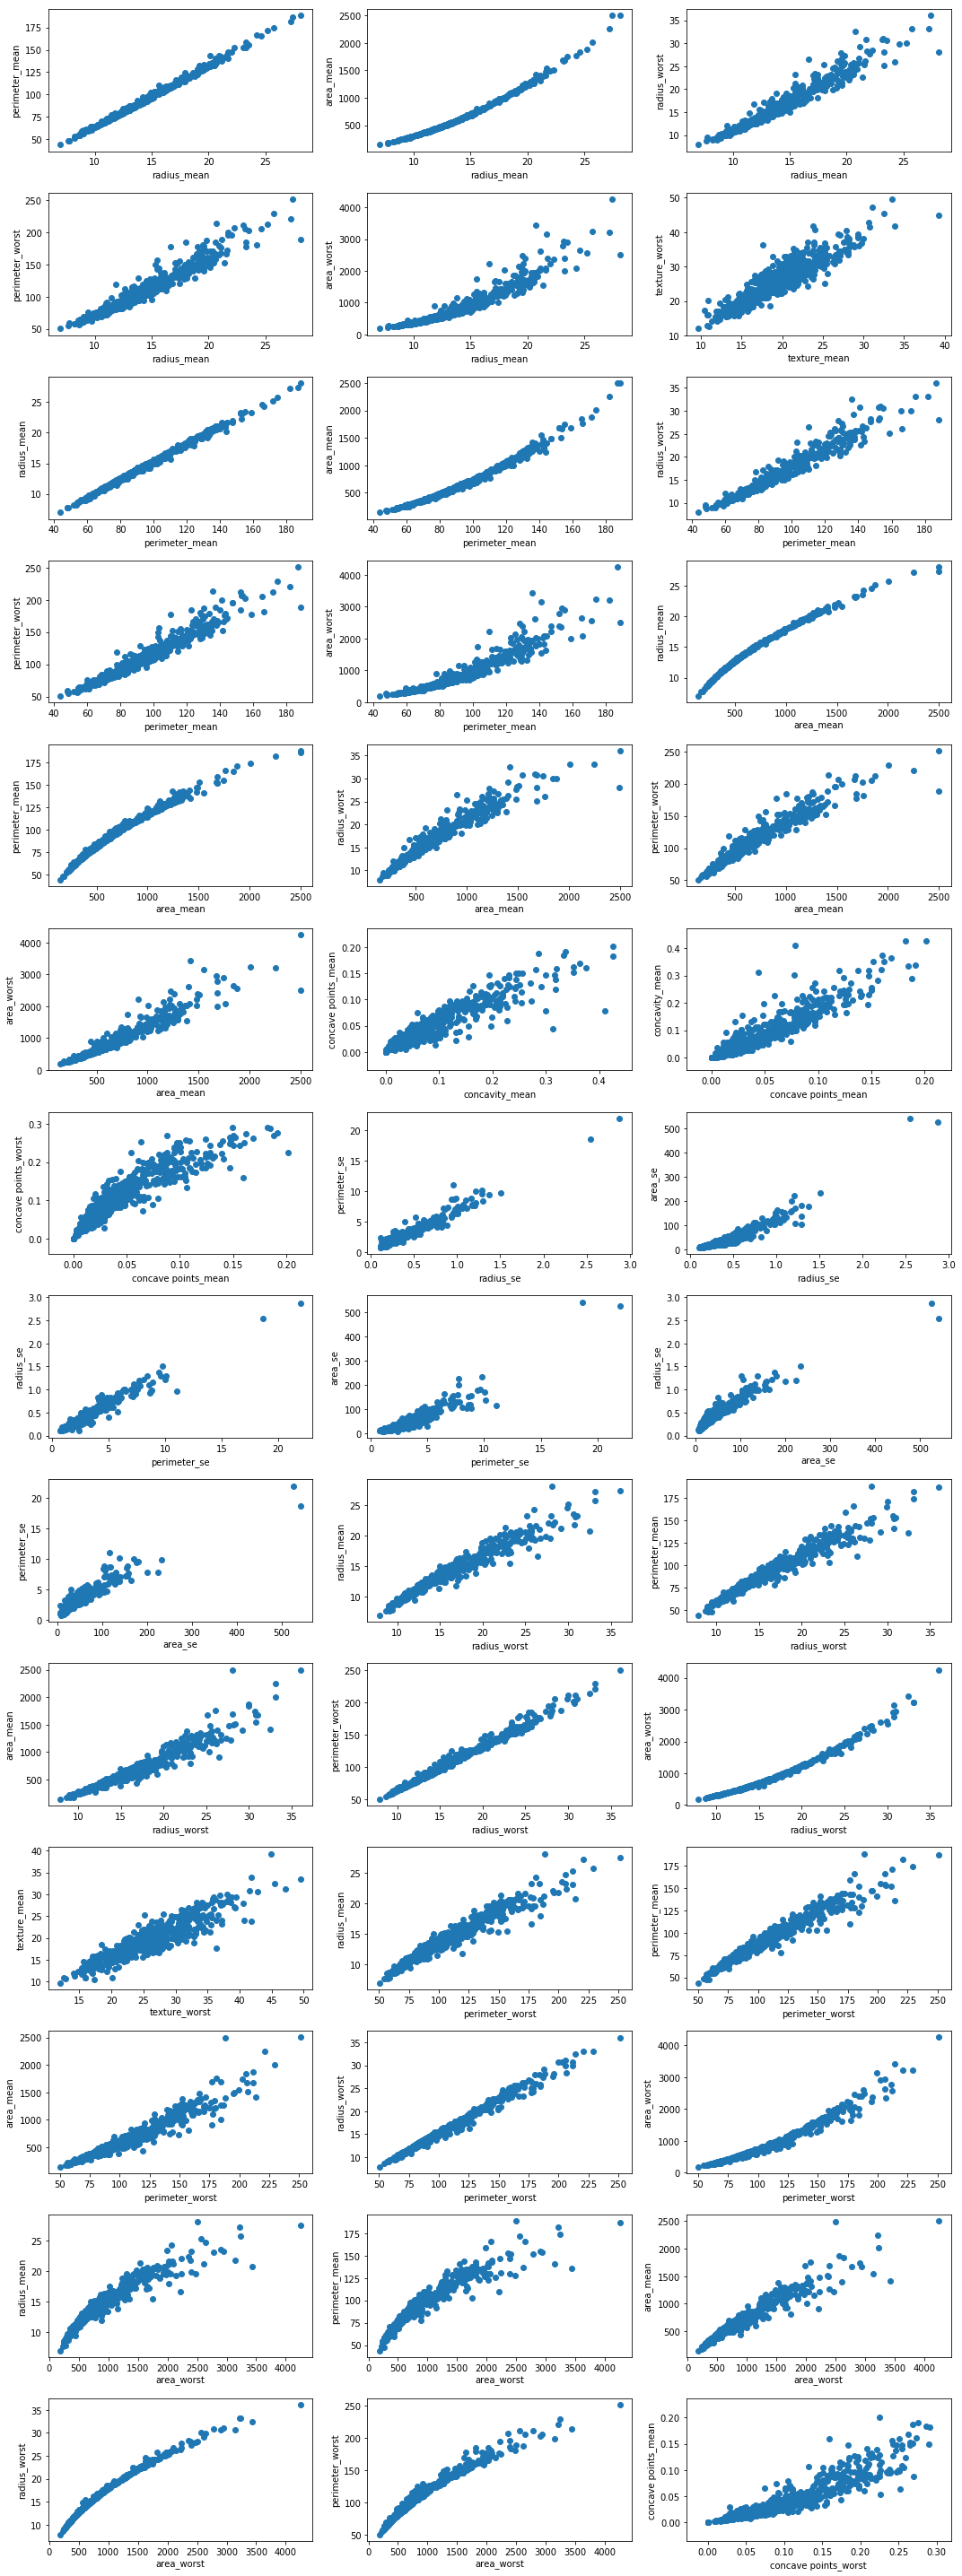

In [54]:
corr=df.corr()
max_cor=corr[corr>0.9].stack()
max_cor[max_cor>0.9]
scatter_graph=[]
for i in range(0,len(max_cor)):
    temp_list=[list(max_cor.index[i])]
    if temp_list[0][0]!=temp_list[0][1]:
        scatter_graph=scatter_graph+temp_list

fig, ax = plt.subplots(14,3,figsize=(15,40))  
for i in range(0,len(scatter_graph)):
    ax[i//3][i%3].scatter(x=scatter_graph[i][0],y=scatter_graph[i][1],data=df)
    ax[i//3][i%3].set_ylabel(scatter_graph[i][1])
    ax[i//3][i%3].set_xlabel(scatter_graph[i][0])
plt.tight_layout()

После анализа корреляционный матрицы, можно удалить фичи, которые имеют очень высокую корреляци, чтобы избежать переобучения.
С переменной radius_mean сильно коррелируют следующие перменные (удалим их):   
area_mean, perimeter_mean, perimeter_worst, radius_worst, area_worst   
C переменной texture_mean - texture_worst   
C переменной concavity_mean - concave points_mean   
C переменной radius_se - perimeter_se, area_se                 

In [55]:
df.drop(["perimeter_mean","area_mean","perimeter_worst","radius_worst","area_worst",
         "texture_worst","concave points_mean","concave points_mean","area_se","perimeter_se"],axis=1,inplace=True)

Текущая матрица корреляции:

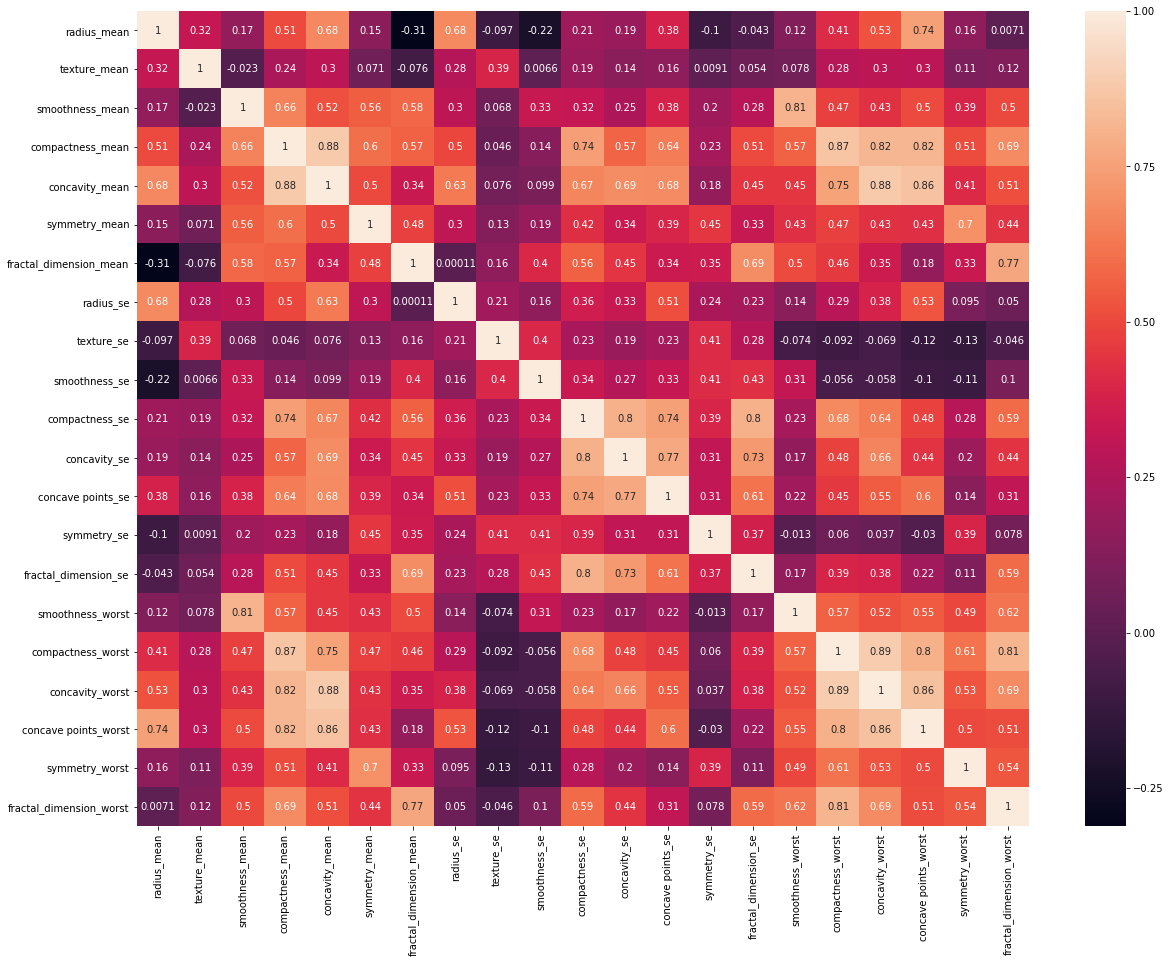

In [56]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

### 6. С помощью статистических методов проверить взаимосвязи между переменными.

### 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

### 8. Рассчитать Feature Selection для выбранных переменных.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [133]:
df.columns=['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_Y']

In [134]:
labelencoder_Y=LabelEncoder()
df['diagnosis_Y']=labelencoder_Y.fit_transform(df.diagnosis)
x_train, x_test, y_train, y_test = train_test_split(X,df.diagnosis_Y,test_size=0.25, random_state=0)

In [135]:
X=df.drop(['diagnosis','diagnosis_Y'],axis=1)
X2=sm.add_constant(X)
est=sm.OLS(df.diagnosis_Y,X2).fit()
est.summary().tables[1]
est.pvalues.sort_values(ascending=False).index

Index(['smoothness_mean', 'symmetry_se', 'fractal_dimension_se',
       'compactness_worst', 'compactness_se', 'symmetry_mean',
       'smoothness_worst', 'texture_se', 'smoothness_se',
       'fractal_dimension_mean', 'compactness_mean', 'concavity_mean',
       'concavity_worst', 'fractal_dimension_worst', 'concave_points_worst',
       'concave_points_se', 'symmetry_worst', 'radius_se', 'const',
       'concavity_se', 'radius_mean', 'texture_mean'],
      dtype='object')

In [114]:
lin_reg = LogisticRegression().fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

D:\Netology\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2773500981126146

In [136]:
columns = [
    'smoothness_mean', 'symmetry_se', 'fractal_dimension_se',
       'compactness_worst', 'compactness_se', 'symmetry_mean',
       'smoothness_worst', 'texture_se', 'smoothness_se',
       'fractal_dimension_mean', 'compactness_mean', 'concavity_mean',
       'concavity_worst', 'fractal_dimension_worst', 'concave_points_worst',
       'concave_points_se', 'symmetry_worst', 'radius_se', 'const',
       'concavity_se', 'radius_mean', 'texture_mean'
]

train_df = pd.DataFrame(np.c_[x_train, y_train], columns=columns)
test_df = pd.DataFrame(np.c_[x_test, y_test], columns=columns)

In [137]:
def get_formula(_cols):
    return 'diagnosis ~ ' + " + ".join(_cols)

In [138]:
get_formula(columns)

'diagnosis ~ smoothness_mean + symmetry_se + fractal_dimension_se + compactness_worst + compactness_se + symmetry_mean + smoothness_worst + texture_se + smoothness_se + fractal_dimension_mean + compactness_mean + concavity_mean + concavity_worst + fractal_dimension_worst + concave_points_worst + concave_points_se + symmetry_worst + radius_se + const + concavity_se + radius_mean + texture_mean'

In [139]:
lm = smf.ols(get_formula(columns), train_df).fit()
#rss = np.sum(lm.resid ** 2)
#rmse = np.sqrt(rss / len(lm.resid))
#print("RMSE:", rmse)
#print("R^2:", lm.rsquared)

PatsyError: Error evaluating factor: NameError: name 'diagnosis' is not defined
    diagnosis ~ smoothness_mean + symmetry_se + fractal_dimension_se + compactness_worst + compactness_se + symmetry_mean + smoothness_worst + texture_se + smoothness_se + fractal_dimension_mean + compactness_mean + concavity_mean + concavity_worst + fractal_dimension_worst + concave_points_worst + concave_points_se + symmetry_worst + radius_se + const + concavity_se + radius_mean + texture_mean
    ^^^^^^^^^

### 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [93]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)
y_pred_log = logisticRegr.predict_proba(x_test)



RandomForest = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state = 0)
RandomForest.fit(x_train,y_train)
y_pred_random_forest = RandomForest.predict_proba(x_test)


result = pd.concat([pd.DataFrame(y_pred_random_forest), pd.DataFrame(y_pred_log)], axis=1, sort=False)
result.head()

D:\Netology\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1,0,1
0,0.0,1.0,0.339702,0.660298
1,0.9,0.1,0.869494,0.130506
2,1.0,0.0,0.852627,0.147373
3,0.9,0.1,0.745515,0.254485
4,1.0,0.0,0.973130,0.026870


### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("RandomForest")
print("Accurancy = {}".format(accuracy_score(y_test,y_pred_random_forest)))
print("F1-Score = {}".format(f1_score(y_test,y_pred_random_forest,average="macro")))
print("Precision = {}".format(precision_score(y_test,y_pred_random_forest,average="macro")))
print("Recall = {}\n".format(recall_score(y_test,y_pred_random_forest,average="macro")))

print("LogisticRegression")
print("Accurancy = {}".format(accuracy_score(y_test,y_pred_log)))
print("F1-Score = {}".format(f1_score(y_test,y_pred_log,average="macro")))
print("Precision = {}".format(precision_score(y_test,y_pred_log,average="macro")))
print("Recall = {}\n".format(recall_score(y_test,y_pred_log,average="macro")))

RandomForest
Accurancy = 0.9230769230769231
F1-Score = 0.9184678380759861
Precision = 0.9145114942528736
Recall = 0.9233752620545074

LogisticRegression
Accurancy = 0.9230769230769231
F1-Score = 0.9172323072875559
Precision = 0.918956043956044
Recall = 0.9156184486373166

